<h1><center> <span style='color:midnightblue'> KKBox Churn Prediction </center> <span>

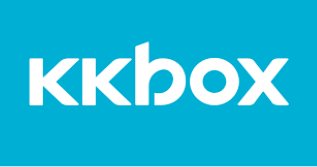

KKBOX offers subscription based music streaming service. When users signs up for the service, users can choose to either manual renew or auto- renew the service. Users can actively cancel their membership at any time.

##  <span style='color:royalblue'>  1. Load required libraries </span>

In [3]:
library(dynlm)
library(stargazer)
library(rpart.plot)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: rpart


##  <span style='color:royalblue'>  2. Load dataset </span>

In [11]:
df <- read.csv("./kkbox.csv", sep = ",")

##  <span style='color:royalblue'>  3. Inspect dataset </span>

In [12]:
head(df,5)

X,msno,is_churn,is_duplicate,city,age,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,n_transactions,payment_price_diff
1,i2yEo5KgaYOUq6mB5NSkvuhWaaABIvZ+Eh+eoXgh5cA=,0,1,18,58,1,9,20101225,37.00000,30.15385,149.0000,149.0000,1.00,0,26,0.000000
2,s0CdCMi/OHDlJ2SpVRnNUHCm/gE3bzWle2SXmiOleoc=,0,1,5,50,2,9,20050301,34.00000,21.81818,108.3636,149.0000,1.00,0,22,-40.636364
3,kdSilnz+HJR51K1kdkTORskArKnXnR9tm5ThEemy/D8=,0,1,4,39,1,3,20150109,40.00000,30.15385,149.0000,143.2692,1.00,0,26,5.730769
4,sg+WFiIjdBAqEY5mTjaqy5B4MYrJ8OhiheE/9vtmib4=,0,0,5,20,2,3,20140414,28.04545,30.00000,149.9545,156.7727,0.00,0,22,-6.818182
5,RCoAnYYv79B8HrrLew4I83ZsJMGy7sOrVupfN60MKu4=,0,1,13,36,1,3,20150530,36.00000,30.00000,166.5000,166.5000,0.55,0,20,0.000000


In [13]:
skimr::skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             10000 
Number of columns          17    
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  16    
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 msno                  0             1 FALSE      10000
  top_counts                    
1 ++G: 1, +/o: 1, +/v: 1, +0B: 1

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable          n_missing complete_rate          mean         sd
 1 X                              0             1     5000.      2887.    
 2 is_churn                       0             1        0.0896     0.286 
 3 is_duplicate                   0             1 

##  <span style='color:royalblue'>  4. Split into train and test sets </span>

In [14]:
train <- df[1:8000,]
test <- df[8001:10000,]

##  <span style='color:royalblue'>  5. Fit and Summarize Linear Model </span>

In [15]:
model <- glm(is_churn ~ ., data = train[,-c(1,2,9)], family=binomial)

In [16]:
stargazer::stargazer(model, type = "html", report = "vc*", star.cutoffs = c(.05, .01, .001), out = "./table1.html")


<table style="text-align:center"><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="1" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>is_churn</td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">is_duplicate</td><td>-2.964<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td style="text-align:left">city</td><td>-0.003</td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td style="text-align:left">age</td><td>0.020<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td style="text-align:left">gender</td><td>-0.068</td></tr>
<tr><td style="text-align:left"></td><td></td></tr>
<tr><td style="text-align:left">registered_via</td><td>-0.040<sup>*</sup></td></tr>
<tr><td style="text-align:left"><

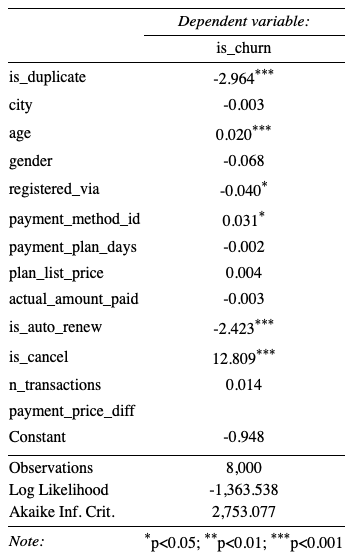

##  <span style='color:royalblue'>  6. Generate prediction and get accuracy </span>

In [17]:
prediction <- predict(model, type='response', newdata = test[,-c(1,2,9)])
prediction <- ifelse(prediction > .5,1,0)
misClasificError <- mean(prediction != test$is_churn)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

In [18]:
print(1-misClasificError)

[1] 0.9295


##  <span style='color:royalblue'>  7. Fit and Summarize Decision Tree Model </span>


Classification tree:
rpart::rpart(formula = is_churn ~ ., data = train[, -c(1, 2, 
    9)], method = "class", control = rpart::rpart.control(minsplit = 20, 
    cp = 0.01))

Variables actually used in tree construction:
[1] age           is_auto_renew is_cancel     is_duplicate 

Root node error: 704/8000 = 0.088

n= 8000 

        CP nsplit rel error  xerror     xstd
1 0.066051      0   1.00000 1.00000 0.035992
2 0.056818      2   0.86790 0.95739 0.035290
3 0.010417      3   0.81108 0.83381 0.033128
4 0.010000      6   0.77983 0.85511 0.033515


Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call prp with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”

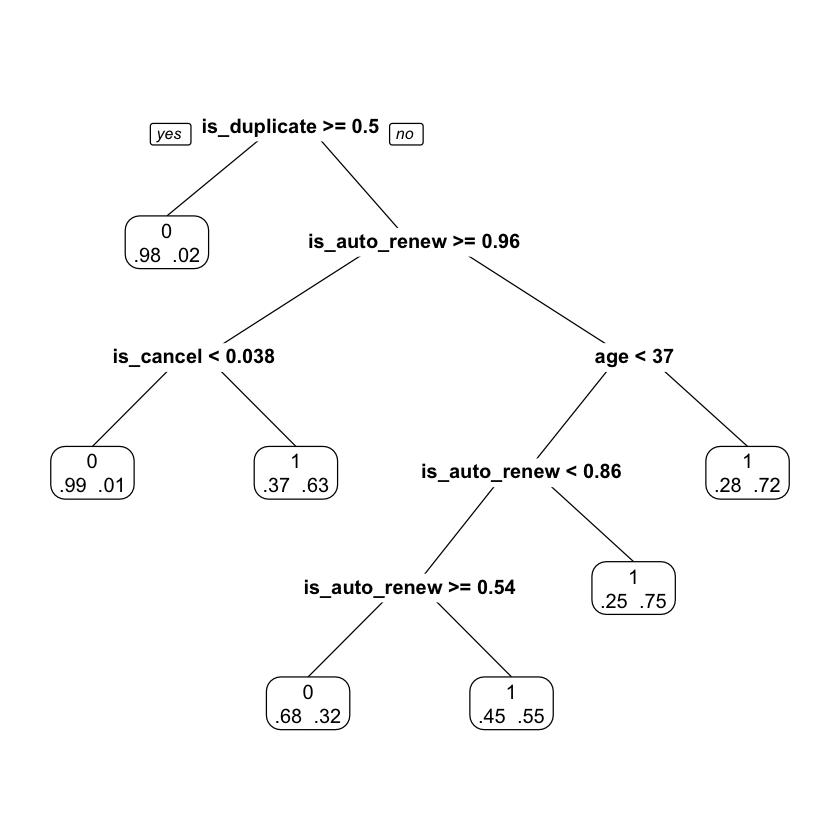

In [19]:
train$is_churn <- factor(train$is_churn, levels = c(0,1), labels = c("0", "1"))
kkbox_tree <- rpart::rpart(is_churn ~ ., method="class", data = train[,-c(1,2,9)],
                            control = rpart::rpart.control(minsplit = 20, cp = .01))
rpart::printcp(kkbox_tree)
rpart.plot::prp(kkbox_tree, type=0, extra=4, varlen=0)

##  <span style='color:royalblue'>  8. Generate prediction and get accuracy </span>

In [20]:
prediction <- predict(kkbox_tree, test, type = "vector") - 1
misClasificError <- mean(prediction != test$is_churn)
print(1-misClasificError)

[1] 0.932


##  <span style='color:royalblue'>  9. Prune Decision Tree </span>


Classification tree:
rpart::rpart(formula = is_churn ~ ., data = train[, -c(1, 2, 
    9)], method = "class", control = rpart::rpart.control(minsplit = 20, 
    cp = 0.01))

Variables actually used in tree construction:
[1] is_auto_renew is_cancel     is_duplicate 

Root node error: 704/8000 = 0.088

n= 8000 

        CP nsplit rel error  xerror     xstd
1 0.066051      0   1.00000 1.00000 0.035992
2 0.056818      2   0.86790 0.95739 0.035290
3 0.015000      3   0.81108 0.83381 0.033128


Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call prp with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”

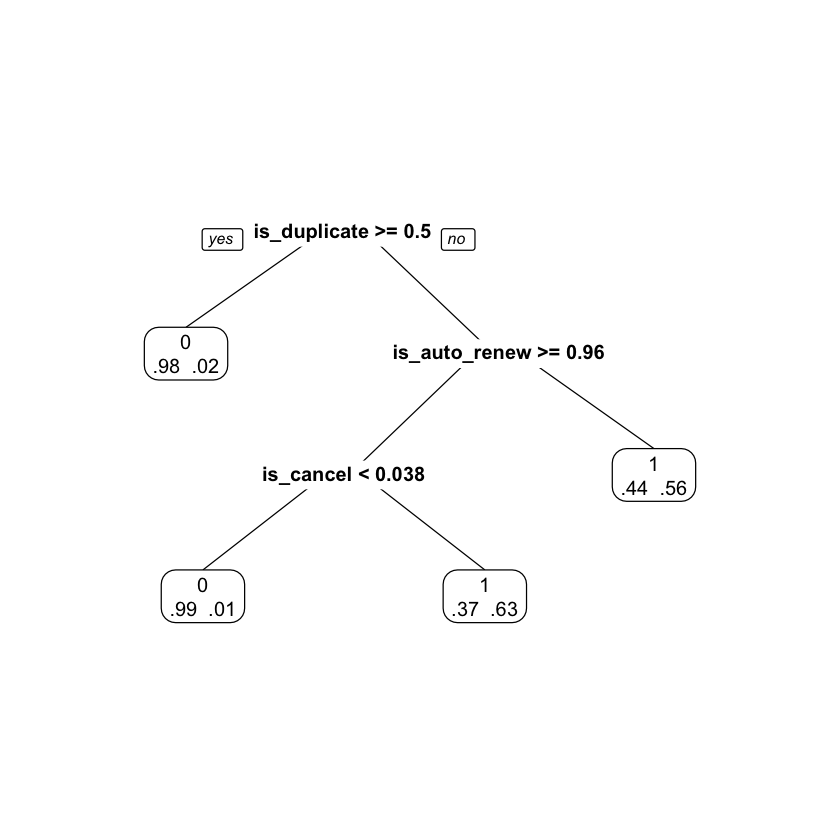

In [21]:
kkbox_tree_pruned <- prune(kkbox_tree, cp = 0.015)
rpart::printcp(kkbox_tree_pruned)
rpart.plot::prp(kkbox_tree_pruned, type=0, extra=4, varlen=0)

##  <span style='color:royalblue'>  10. Generate prediction and get accuracy </span>

In [22]:
prediction <- predict(kkbox_tree_pruned, test, type = "vector") - 1
misClasificError <- mean(prediction != test$is_churn)
print(1-misClasificError)

[1] 0.931
